In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
from numpy import median
from numpy import std
from scipy import stats

In [13]:
data = pd.read_csv("/content/marketing_data.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [14]:
data.shape

(2240, 28)

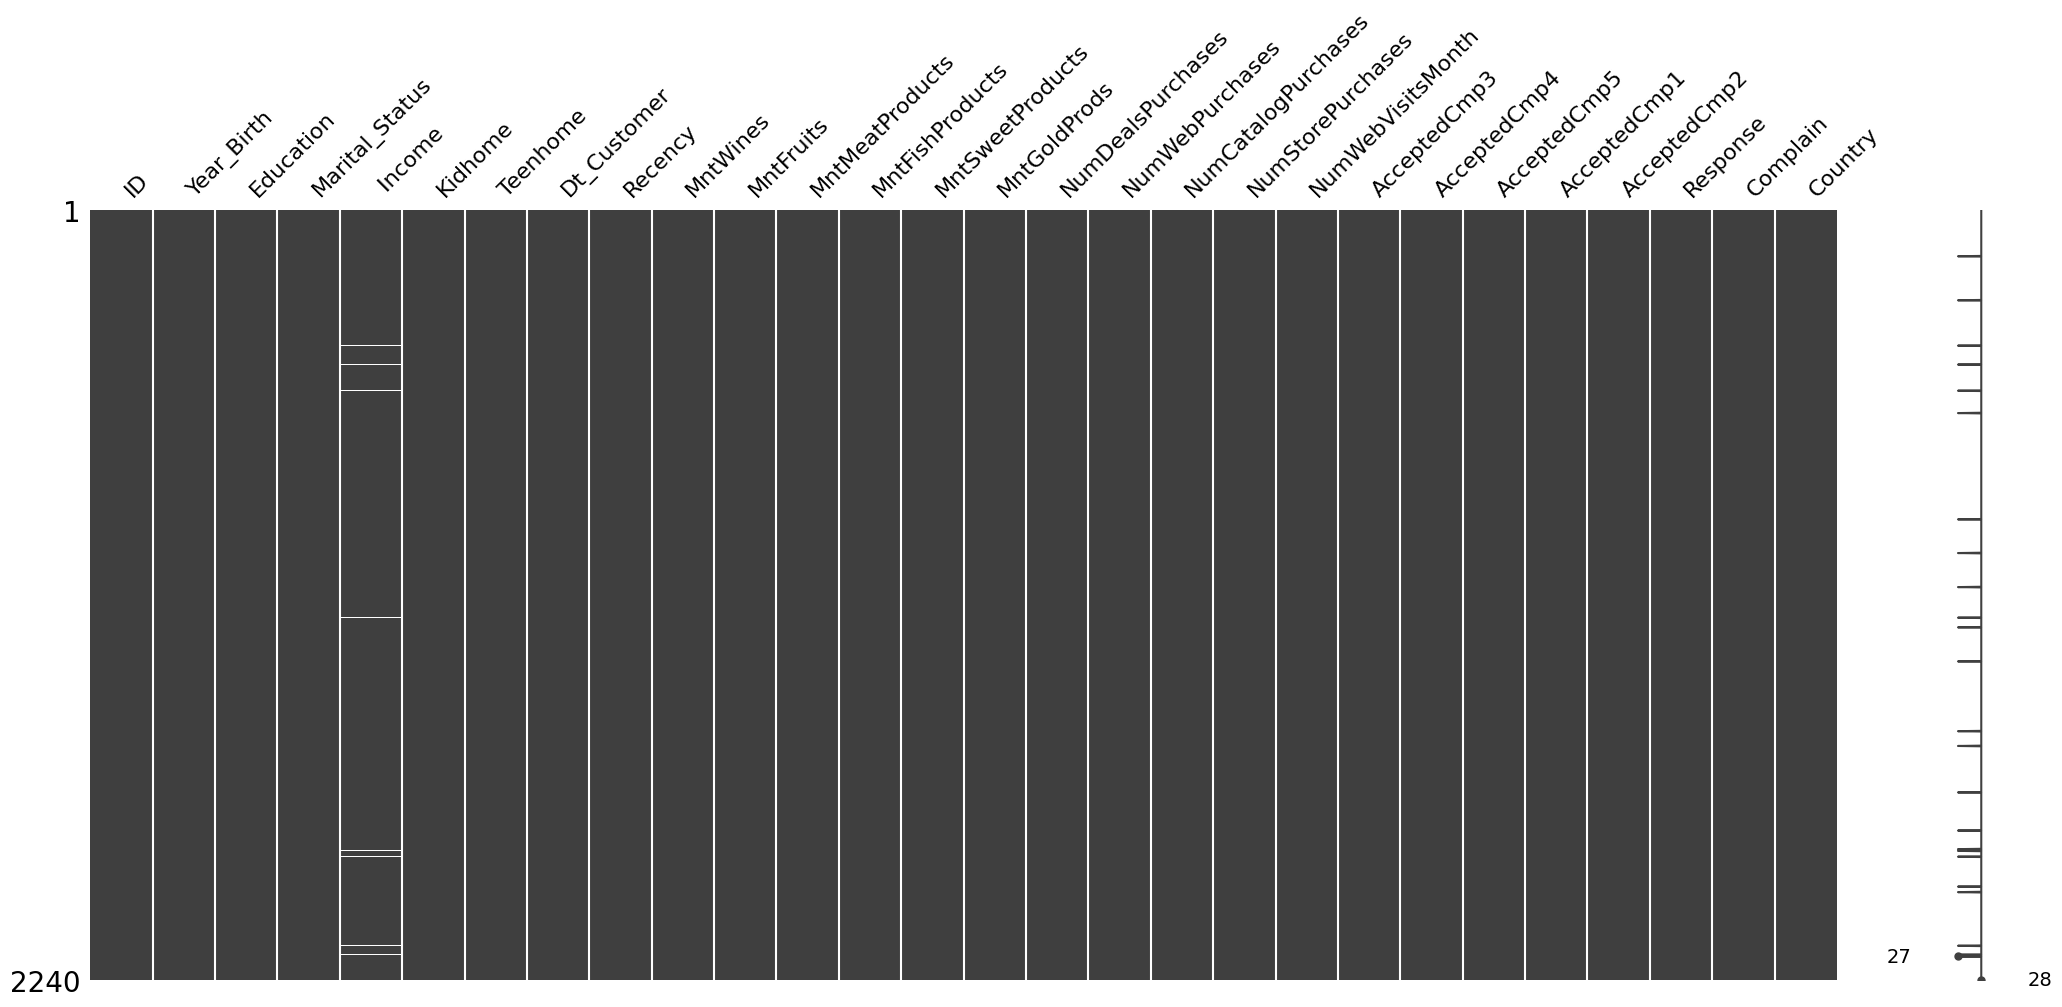

In [15]:
msno.matrix(data)
plt.show()

In [16]:
missingvalues = data.isnull().sum()
missingvalues.loc[missingvalues!=0]

,0
Income,24


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [18]:
data.rename(columns={' Income ':'Income'},inplace=True)
data["Income"] = data["Income"].str.replace("$","").str.replace(',', '')
data["Income"] = data["Income"].astype(float)

In [19]:
data['Age']=2025-data['Year_Birth']
data['Spending']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data['Marital_Situation']=data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
data['Has_child'] = np.where(data.Kidhome+data.Teenhome > 0, 'Yes', 'No')
data['Educational_years']=data['Education'].replace({'Basic':5,'2n Cycle':8,'Graduation':12,'Master':18,'PhD':21})
data=data[['Age','Income','Spending','Marital_Situation','Has_child','Educational_years', 'Education']]

<ipython-input-19-e8c98ef62bb7>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Educational_years']=data['Education'].replace({'Basic':5,'2n Cycle':8,'Graduation':12,'Master':18,'PhD':21})


In [20]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

,Age,Income,Spending,Educational_years
count,2240.00,2216.00,2240.00,2240.00
mean,56.19,52247.25,605.80,14.41
std,11.98,25173.08,602.25,4.51
min,29.00,1730.00,5.00,5.00
25%,48.00,35303.00,68.75,12.00
50%,55.00,51381.50,396.00,12.00
75%,66.00,68522.00,1045.50,18.00
max,132.00,666666.00,2525.00,21.00


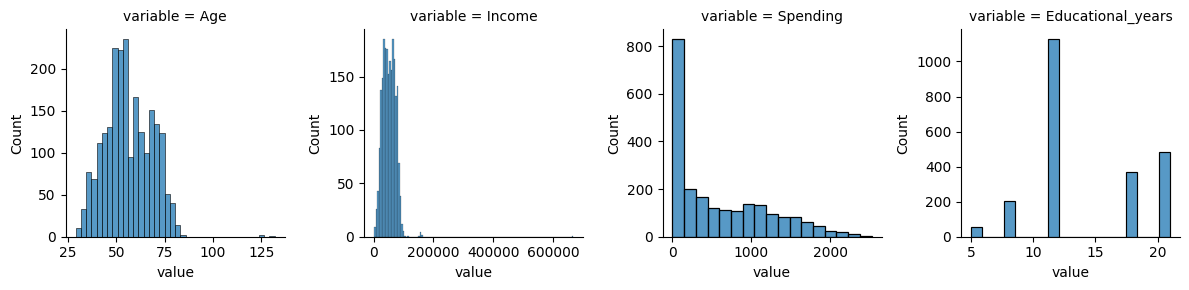

In [21]:
df = pd.DataFrame(data=data, columns=['Age','Income','Spending','Educational_years'])

nd = pd.melt(df, value_vars =df )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.histplot, 'value')
n1

<Axes: ylabel='Income'>

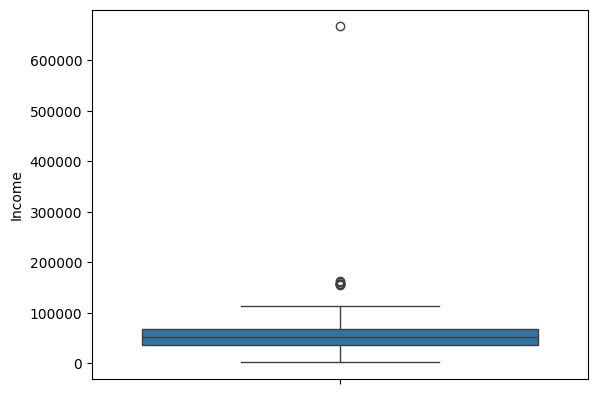

In [22]:
sns.boxplot(data = data['Income'])

In [23]:
df = data[['Age','Income','Spending','Educational_years']]

fig = px.box(df.melt(), y="value", facet_col="variable",facet_col_wrap=2, boxmode="overlay", color="variable",height=1000, width=900)
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=2, linecolor='grey')
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')

fig.show()

In [24]:
dataset = data.drop(data[data['Income']> 600000].index).reset_index(drop=True)
dataset

,Age,Income,Spending,Marital_Situation,Has_child,Educational_years,Education
0,55,84835.00,1190,Alone,No,12,Graduation
1,64,57091.00,577,Alone,No,12,Graduation
2,67,67267.00,251,In couple,Yes,12,Graduation
3,58,32474.00,11,In couple,Yes,12,Graduation
4,36,21474.00,91,Alone,Yes,12,Graduation
...,...,...,...,...,...,...,...
2234,49,66476.00,689,Alone,Yes,21,PhD
2235,48,31056.00,55,In couple,Yes,8,2n Cycle
2236,49,46310.00,309,Alone,Yes,12,Graduation
2237,47,65819.00,1383,In couple,No,12,Graduation


In [25]:
imputer = KNNImputer()
imputer = KNNImputer(n_neighbors=5,metric='nan_euclidean')
imputer.fit(dataset[['Income','Age','Educational_years']])
X = imputer.transform(dataset[['Income','Age','Educational_years']])
Income_impute=pd.DataFrame(X,columns=['Income','Age','Educational_years'])
dataset['Income']=Income_impute['Income'].reset_index(drop=True)
count_nan = len(dataset) - dataset.count()
print(count_nan)

Age                  0
Income               0
Spending             0
Marital_Situation    0
Has_child            0
Educational_years    0
Education            0
dtype: int64


<Axes: >

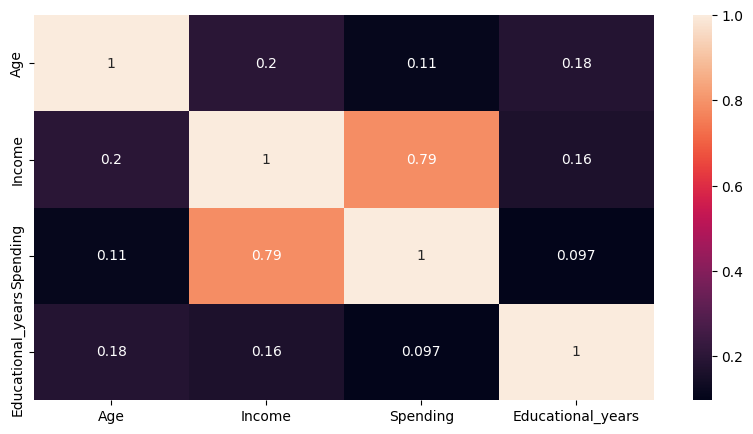

In [28]:
plt.figure(figsize=(10,5))
pltData = dataset[['Age','Income','Spending','Educational_years']]
sns.heatmap(pltData.corr(),annot=True)

In [29]:
df = dataset[['Income','Education']]
category_orders={"Education":["Basic","2n Cycle","Graduation","Master","PhD"]}
fig = px.histogram(df, x="Education",y="Income",  histfunc='avg',category_orders=category_orders)
fig.show()

In [30]:
reg = LinearRegression()
fig = go.Figure(data=go.Scatter(name='observations',x=dataset['Spending'], y=dataset['Income'],mode='markers'))

fig.update_traces(hovertemplate='Spending: %{x} <br>Income: %{y}')
fig.show()

In [31]:
dataset['Marital_Situation']=dataset['Marital_Situation'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

In [32]:
df = dataset[['Education','Marital_Situation']]

fig = px.sunburst(df, path=['Marital_Situation','Education'],color_discrete_sequence=px.colors.sequential.Rainbow)
fig.show()

In [33]:
fig = px.histogram(dataset,
                   x='Income',
                   marginal='box',
                   color='Has_child',
                   color_discrete_sequence=['blue', 'green'],
                   title='Income level by parental status')
fig.update_layout(bargap=0.1)
fig.show()

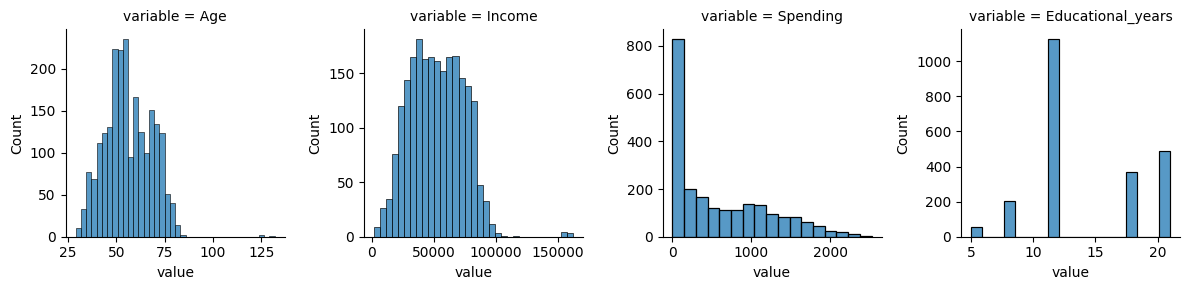

In [34]:
df = pd.DataFrame(data=dataset, columns=['Age','Income','Spending','Educational_years'])
nd = pd.melt(df, value_vars =df )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.histplot, 'value')
n1

In [35]:
X=['Age','Income','Spending','Educational_years']

column_dict= {elem : pd.DataFrame() for elem in X}

def shapiro_test(data):
    stat, p = shapiro(data)
    print('%s : Statistics=%.3f, p=%.3f' % (column,stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (We fail to reject H0)')
    else:
        print('Sample does not look Gaussian (We reject H0)')

for column in X:
    column_dict[column] = dataset[column]
    shapiro_test(column_dict[column])

Age : Statistics=0.976, p=0.000
Sample does not look Gaussian (We reject H0)
Income : Statistics=0.976, p=0.000
Sample does not look Gaussian (We reject H0)
Spending : Statistics=0.865, p=0.000
Sample does not look Gaussian (We reject H0)
Educational_years : Statistics=0.833, p=0.000
Sample does not look Gaussian (We reject H0)


In [36]:
Diploma=dataset[['Education','Income']]

Phd_graduate=Diploma[Diploma['Education']=='PhD']
Master_graduate=Diploma[Diploma['Education']=='Master']
Basic_graduate=Diploma[Diploma['Education']=='Basic']
Second_cycle_graduate=Diploma[Diploma['Education']=='2n Cycle']
Graduation_graduate=Diploma[Diploma['Education']=='Graduation']

In [37]:
stat, p = shapiro(Phd_graduate.Income)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.943, p=0.000
Sample does not look Gaussian (reject H0)


In [38]:
stat, p = shapiro(Master_graduate.Income)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.978, p=0.000
Sample does not look Gaussian (reject H0)


In [39]:
print('PhD: median = %.0f stdv = %.1f' % (median(Phd_graduate.Income), std(Phd_graduate.Income)))
print('Master: median = %.0f stdv = %.1f' % (median(Master_graduate.Income), std(Master_graduate.Income)))

print(stats.mannwhitneyu(Phd_graduate.Income, Master_graduate.Income))

if p > alpha:
	print('Means are not statistically different (We fail to reject H0)')
else:
	print('Means are statistically different (We reject H0)')

PhD: median = 55185 stdv = 20500.6
Master: median = 50920 stdv = 20014.0
MannwhitneyuResult(statistic=np.float64(97740.5), pvalue=np.float64(0.028891894605555028))
Means are statistically different (We reject H0)


##Rank Correlation Tests


In [40]:
Spending=dataset[['Spending','Income']]

cor, pval = stats.spearmanr(Spending[['Spending']], Spending[['Income']])
print("Non-Parametric Spearman correlation test : correlation coefficient : %.4f, pval: %.4f" % (cor, pval))

Non-Parametric Spearman correlation test : correlation coefficient : 0.8470, pval: 0.0000


The closer Rs is to +1 or -1, the stronger the likely correlation. A perfect positive correlation is +1 and a perfect negative correlation is -1. The Rs value of 0.8466 suggests a fairly strong positive relationship.

The high correlation coefficient induces a strong positive relationship between the two variables, confirming our alternative hypothesis.

##Chi-square test for independance

1. Hypothesis statement¶
H_0 : Education and Marital_Situation are independent
H_a : Education and Marital_Situation are not independent

2. Analysis plan formulation
Significance level : We will test our hypothesis at a 5% significance level
Test method : We use the Chi-square test for independence to determine whether there is a significant relationship between our two categorical variables.

In [41]:
Marital_Situation=dataset[['Education','Marital_Situation']]
crosstab = pd.crosstab(Marital_Situation["Education"], Marital_Situation["Marital_Situation"])
crosstab

Marital_Situation,Alone,In couple
Education,,
2n Cycle,65,138
Basic,20,34
Graduation,408,718
Master,126,244
PhD,177,309


In [42]:
stat, p, dof, expected = chi2_contingency(crosstab)
print('Degress of freedom = %d' % dof)

Degress of freedom = 4


In [44]:
print(expected)

[[ 72.16971862 130.83028138]
 [ 19.19785619  34.80214381]
 [400.31085306 725.68914694]
 [131.54086646 238.45913354]
 [172.78070567 313.21929433]]


In [45]:
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=9.488, stat=1.908


In [46]:
if abs(stat) >= critical:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')

Independent (We fail to reject H0)
significance=0.050, p=0.753
Independent (We fail to reject H0)
